# **Import Libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
from io import StringIO

Load Dataset

In [2]:
data = pd.read_csv(StringIO('''
Dates,Prices
10/31/20,1.01E+01
11/30/20,1.03E+01
12/31/20,1.10E+01
1/31/21,1.09E+01
2/28/21,1.09E+01
3/31/21,1.09E+01
4/30/21,1.04E+01
5/31/21,9.84E+00
6/30/21,1.00E+01
7/31/21,1.01E+01
8/31/21,1.03E+01
9/30/21,1.02E+01
10/31/21,1.01E+01
11/30/21,1.12E+01
12/31/21,1.14E+01
1/31/22,1.15E+01
2/28/22,1.18E+01
3/31/22,1.15E+01
4/30/22,1.07E+01
5/31/22,1.07E+01
6/30/22,1.04E+01
7/31/22,1.05E+01
8/31/22,1.04E+01
9/30/22,1.08E+01
10/31/22,1.10E+01
11/30/22,1.16E+01
12/31/22,1.16E+01
1/31/23,1.21E+01
2/28/23,1.17E+01
3/31/23,1.20E+01
4/30/23,1.15E+01
5/31/23,1.12E+01
6/30/23,1.09E+01
7/31/23,1.14E+01
8/31/23,1.11E+01
9/30/23,1.15E+01
10/31/23,1.18E+01
11/30/23,1.22E+01
12/31/23,1.28E+01
1/31/24,1.26E+01
2/29/24,1.24E+01
3/31/24,1.27E+01
4/30/24,1.21E+01
5/31/24,1.14E+01
6/30/24,1.15E+01
7/31/24,1.16E+01
8/31/24,1.15E+01
9/30/24,1.18E+01
'''), parse_dates=['Dates'])

data.set_index('Dates', inplace=True)

<ipython-input-2-0aa8ecc458a5>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv(StringIO('''


Plot Graphs

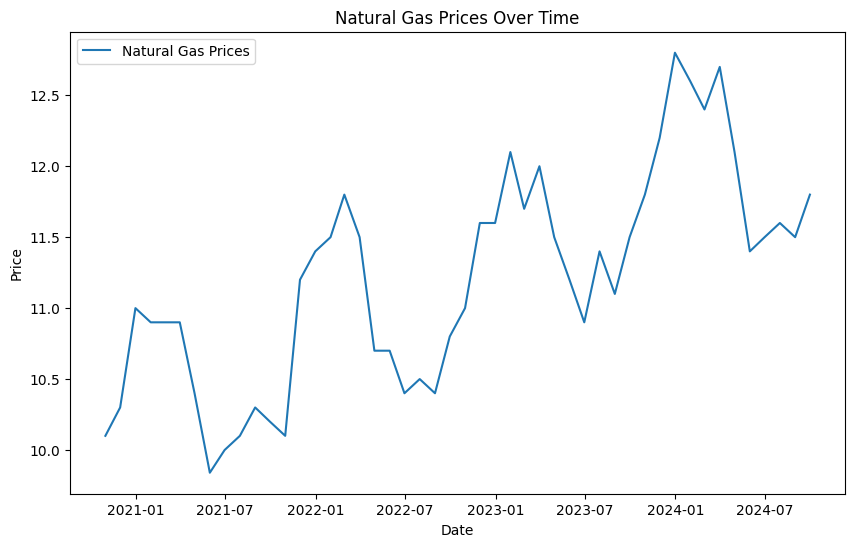

<ipython-input-3-d87f37011f59>:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  extrapolated_dates = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=12, freq='M')


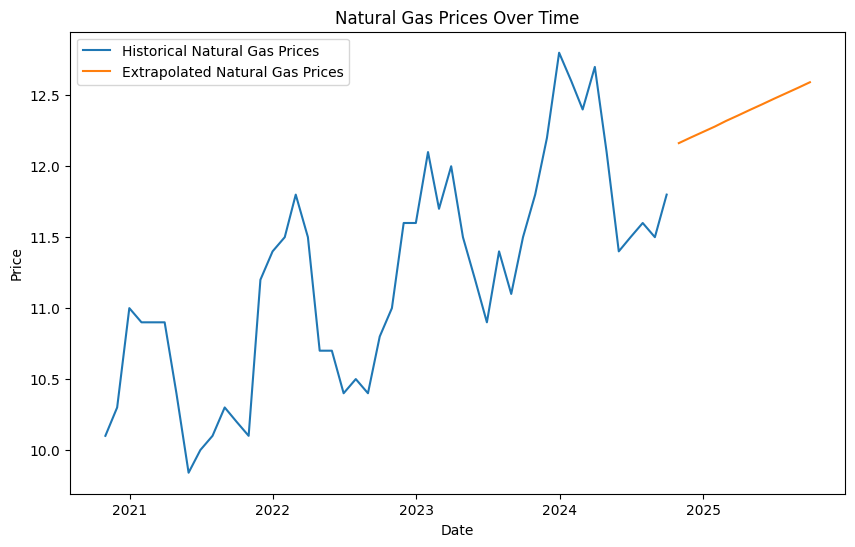

In [3]:
plt.figure(figsize=(10,6))
plt.plot(data.index, data['Prices'], label='Natural Gas Prices')
plt.title('Natural Gas Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()



# Extrapolate the data for an extra year
last_date = data.index[-1]
extrapolated_dates = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=12, freq='M')

model = LinearRegression()
model.fit(np.arange(len(data)).reshape(-1, 1), data['Prices'])
extrapolated_prices = model.predict(np.arange(len(data), len(data) + 12).reshape(-1, 1))

# Create a new DataFrame with the extrapolated data
extrapolated_data = pd.DataFrame({'Dates': extrapolated_dates, 'Prices': extrapolated_prices})

plt.figure(figsize=(10,6))
plt.plot(data.index, data['Prices'], label='Historical Natural Gas Prices')
plt.plot(extrapolated_data['Dates'], extrapolated_data['Prices'], label='Extrapolated Natural Gas Prices')
plt.title('Natural Gas Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

Finally, Predict the prices

In [4]:
def estimate_price(date):
    date = pd.to_datetime(date)
    if date <= last_date:
      closest_date_index = data.index.get_indexer([date], method='nearest')[0]
      closest_date = data.index[closest_date_index]
      return data.loc[closest_date, 'Prices']
    else:
      months_since_start = (date - data.index[0]).days / 30
      return model.predict(np.array([[months_since_start]]))[0]

# MM/DD/YY
estimate_price('12/31/26')

13.218866261398174